In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def collect_team_data(match_logs_url, market_value_url, team_name):
    # Headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    # Extracting match logs
    dfTeam = pd.read_html(match_logs_url, attrs={'id': 'matchlogs_for'})[0]
    
    # Filter out records where "Competition" is not "La Liga"
    dfTeam = dfTeam[dfTeam['Comp'] == 'La Liga']

    # Remove the last three columns
    dfTeam = dfTeam.iloc[:, :-3]
    
    # Remove rows where "Result" is NaN
    dfTeam.dropna(subset=['Result'], inplace=True)

    # Convert 'GF' and 'GA' columns to numeric types, handle errors by converting them to NaN
    dfTeam['GF'] = pd.to_numeric(dfTeam['GF'], errors='coerce')
    dfTeam['GA'] = pd.to_numeric(dfTeam['GA'], errors='coerce')
    
    # Define a function to convert Result to points
    def result_to_points(result):
        if result == 'D':
            return 1
        elif result == 'W':
            return 3
        elif result == 'L':
            return 0
        else:
            return None  # Handle unexpected results
    
    # Apply the function to the 'Result' column to create the 'points' column
    dfTeam['points'] = dfTeam['Result'].apply(result_to_points)
    
    # Calculate GD (Goal Difference) as GF - GA
    dfTeam['GD'] = dfTeam['GF'] - dfTeam['GA']

    # Calculating cumulative points
    dfTeam['cum_points'] = dfTeam['points'].cumsum()

    # Calculating Points per Game (PpG)
    dfTeam['PpG'] = dfTeam['cum_points'] / (dfTeam.index + 1)

    dfTeam['Venue'] = dfTeam['Venue'].map({'Home': 1, 'Away': 0})

    
    # Scrape the market value
    response = requests.get(market_value_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    market_value_element = soup.find('a', class_='data-header__market-value-wrapper')
    if market_value_element:
        market_value = market_value_element.text.strip().split(" ")[0]  # Extract the value and add currency
    else:
        market_value = "N/A"
    
    # Add the market value to the DataFrame as a new column
    dfTeam['Market Value'] = market_value

    # Add the team name to the DataFrame
    dfTeam['Team'] = team_name
    
    return dfTeam

# Example usage:
Barcelona = collect_team_data(
    'https://fbref.com/en/squads/206d90db/Barcelona-Stats',
    'https://www.transfermarkt.ch/fc-barcelona/startseite/verein/131',
    'Barcelona'
)

RayoVallecano = collect_team_data(
    'https://fbref.com/en/squads/98e8af82/Rayo-Vallecano-Stats',
    'https://www.transfermarkt.ch/rayo-vallecano/startseite/verein/367',
    'Rayo Vallecano'
)

Mallorca = collect_team_data(
    'https://fbref.com/en/squads/2aa12281/Mallorca-Stats',
    'https://www.transfermarkt.ch/rcd-mallorca/startseite/verein/237',
    'Mallorca'
)

Getafe = collect_team_data(
    'https://fbref.com/en/squads/7848bd64/Getafe-Stats',
    'https://www.transfermarkt.ch/fc-getafe/startseite/verein/3709',
    'Getafe'
)

Sevilla = collect_team_data(
    'https://fbref.com/en/squads/ad2be733/Sevilla-Stats',
    'https://www.transfermarkt.ch/fc-sevilla/startseite/verein/368',
    'Sevilla'
)

Cadiz = collect_team_data(
    'https://fbref.com/en/squads/ee7c297c/Cadiz-Stats',
    'https://www.transfermarkt.ch/fc-cadiz/startseite/verein/2687',
    'Cádiz'
)

RealMadrid = collect_team_data(
    'https://fbref.com/en/squads/53a2f082/Real-Madrid-Stats',
    'https://www.transfermarkt.ch/real-madrid/startseite/verein/418',
    'Real Madrid'
)

AtleticoMadrid = collect_team_data(
    'https://fbref.com/en/squads/db3b9613/Atletico-Madrid-Stats',
    'https://www.transfermarkt.ch/atletico-madrid/startseite/verein/13',
    'Atlético Madrid'

)

RealSociedad = collect_team_data(
    'https://fbref.com/en/squads/e31d1cd9/Real-Sociedad-Stats',
    'https://www.transfermarkt.ch/real-sociedad-san-sebastian/startseite/verein/681',
    'Real Sociedad'
)

Girona = collect_team_data(
    'https://fbref.com/en/squads/9024a00a/Girona-Stats',
    'https://www.transfermarkt.ch/fc-girona/startseite/verein/12321',
    'Girona'
)

AthleticClub = collect_team_data(
    'https://fbref.com/en/squads/2b390eca/Athletic-Club-Stats',
    'https://www.transfermarkt.ch/athletic-bilbao/startseite/verein/621',
    'Athletic Club'
)

Betis = collect_team_data(
    'https://fbref.com/en/squads/fc536746/Real-Betis-Stats',
    'https://www.transfermarkt.ch/real-betis-sevilla/startseite/verein/150',
    'Betis'
)

Valencia = collect_team_data(
    'https://fbref.com/en/squads/dcc91a7b/Valencia-Stats',
    'https://www.transfermarkt.ch/fc-valencia/startseite/verein/1049',
    'Valencia'
)

Villareal = collect_team_data(
    'https://fbref.com/en/squads/2a8183b3/Villarreal-Stats',
    'https://www.transfermarkt.ch/fc-villarreal/startseite/verein/1050',
    'Villareal'
)

LasPalmas = collect_team_data(
    'https://fbref.com/en/squads/0049d422/Las-Palmas-Stats',
    'https://www.transfermarkt.ch/ud-las-palmas/startseite/verein/472',
    'Las Palmas'
)

Osasuna = collect_team_data(
    'https://fbref.com/en/squads/03c57e2b/Osasuna-Stats',
    'https://www.transfermarkt.ch/ca-osasuna/startseite/verein/331',
    'Osasuna'
)

Alaves = collect_team_data(
    'https://fbref.com/en/squads/8d6fd021/Alaves-Stats',
    'https://www.transfermarkt.ch/deportivo-alaves/startseite/verein/1108',
    'Alavés'
)

CeltaVigo = collect_team_data(
    'https://fbref.com/en/squads/f25da7fb/Celta-Vigo-Stats',
    'https://www.transfermarkt.ch/celta-vigo/startseite/verein/940',
    'Celta Vigo'
)

Granada = collect_team_data(
    'https://fbref.com/en/squads/a0435291/Granada-Stats',
    'https://www.transfermarkt.ch/fc-granada/startseite/verein/16795',
    'Granada'
)

Almeria = collect_team_data(
    'https://fbref.com/en/squads/78ecf4bb/Almeria-Stats',
    'https://www.transfermarkt.ch/ud-almeria/startseite/verein/3302',
    'Almería'
)

# Create a list of all your team DataFrames
dataframes = [Barcelona, RayoVallecano, Mallorca, Getafe, Sevilla, Cadiz, RealMadrid, AtleticoMadrid, RealSociedad, Girona, AthleticClub, Betis, Valencia, Villareal, LasPalmas, Osasuna, Alaves, CeltaVigo, Granada, Almeria]

# Use pd.concat to combine them into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Step 1: Extract matchweek numbers and allow NaN values to remain
combined_df['Round'] = combined_df['Round'].str.extract('(\d+)')

# Step 2: Safely convert 'Round' to integers, leaving NaN values as is
combined_df['Round'] = pd.to_numeric(combined_df['Round'], errors='coerce')

# Ensure the DataFrame is sorted by 'Round' and 'cum_points' within each 'Round'
combined_df.sort_values(by=['Round', 'cum_points'], ascending=[True, False], inplace=True)

# Step 2: Group by 'Round' and calculate rankings within each group
combined_df['League Position'] = combined_df.groupby('Round')['cum_points'].rank(method='first', ascending=False)

# Sort the DataFrame by 'Team' and 'Date' to ensure the records are in chronological order
combined_df.sort_values(by=['Team', 'Date'], inplace=True)

# Calculate cumulative 'GF' and 'GA' for each team
combined_df['Total_GF'] = combined_df.groupby('Team')['GF'].cumsum()
combined_df['Total_GA'] = combined_df.groupby('Team')['GA'].cumsum()

combined_df['pointsLast3'] = combined_df.groupby('Team')['points'].transform(lambda x: x.rolling(window=3, min_periods=1).sum().shift())

# Assuming 'combined_df' is sorted by team and date
combined_df.sort_values(by=['Team', 'Date'], inplace=True)

# Calculate the cumulative sum of goals for and against for each team
combined_df['cum_GF'] = combined_df.groupby('Team')['GF'].cumsum()
combined_df['cum_GA'] = combined_df.groupby('Team')['GA'].cumsum()

# Calculate the cumulative count of matches for each team to use for the average
combined_df['match_count'] = combined_df.groupby('Team').cumcount() + 1

# Calculate the average goals for and against for each team up to each match
combined_df['avgGF'] = combined_df['cum_GF'] / combined_df['match_count']
combined_df['avgGA'] = combined_df['cum_GA'] / combined_df['match_count']

# Optionally, you can drop the intermediate columns if they are no longer needed
combined_df.drop(['cum_GF', 'cum_GA', 'match_count'], axis=1, inplace=True)

# Ensure the DataFrame is sorted by team and date to correctly apply shifts
combined_df.sort_values(by=['Team', 'Date'], inplace=True)

# Calculate 'pointsLastGame' by shifting the 'points' column for each team
combined_df['pointsLastGame'] = combined_df.groupby('Team')['points'].shift()

# Calculate goal difference for each game, then shift to get 'GDlastGame'
combined_df['GD'] = combined_df['GF'] - combined_df['GA']
combined_df['GDlastGame'] = combined_df.groupby('Team')['GD'].shift()

# After these operations, you might have NaN values for the first game of each team
# since there is no "last game" to reference. You can decide to fill these NaNs with 0 or another appropriate value.
combined_df['pointsLastGame'].fillna(0, inplace=True)
combined_df['GDlastGame'].fillna(0, inplace=True)

# Optionally, after calculating these, you might want to sort the DataFrame back to your preferred order
combined_df.sort_values(by=['Date', 'Round'], inplace=True)

print(combined_df)



<>:198: SyntaxWarning: invalid escape sequence '\d'
<>:198: SyntaxWarning: invalid escape sequence '\d'
C:\Users\apeco\AppData\Local\Temp\ipykernel_44736\2627788515.py:198: SyntaxWarning: invalid escape sequence '\d'
  combined_df['Round'] = combined_df['Round'].str.extract('(\d+)')


           Date   Time     Comp  Round  Day  Venue Result   GF   GA  \
549  2023-08-11  19:30  La Liga      1  Fri      1      L  0.0  2.0   
29   2023-08-11  19:30  La Liga      1  Fri      0      W  2.0  0.0   
116  2023-08-11  22:00  La Liga      1  Fri      1      L  1.0  2.0   
348  2023-08-11  22:00  La Liga      1  Fri      0      W  2.0  1.0   
290  2023-08-12  21:30  La Liga      1  Sat      1      L  0.0  2.0   
..          ...    ...      ...    ...  ...    ...    ...  ...  ...   
433  2024-03-17  15:15  La Liga     29  Sun      1      L  0.0  1.0   
57   2024-03-17  18:30  La Liga     29  Sun      1      W  2.0  0.0   
144  2024-03-17  14:00  La Liga     29  Sun      1      L  1.0  2.0   
375  2024-03-17  16:15  La Liga     29  Sun      0      L  0.0  1.0   
404  2024-03-17  16:15  La Liga     29  Sun      1      W  1.0  0.0   

           Opponent  ...  Market Value            Team  League Position  \
549  Rayo Vallecano  ...         72,80         Almería             20.0 

C:\Users\apeco\AppData\Local\Temp\ipykernel_44736\2627788515.py:247: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['pointsLastGame'].fillna(0, inplace=True)
C:\Users\apeco\AppData\Local\Temp\ipykernel_44736\2627788515.py:248: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [12]:
combined_df.to_csv('combined_data.csv', index=False)


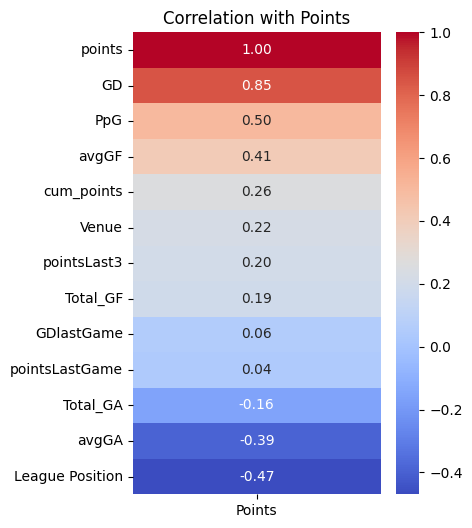

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a list of specific features you're interested in, including "Points"
features_of_interest = ['points', 'Total_GF', 'Total_GA', 'PpG', 'GD', 'Venue', 'cum_points', 'League Position', 'pointsLast3', 'avgGF', 'avgGA', 'pointsLastGame', 'GDlastGame']

# Step 2: Compute the correlation matrix for only these selected features
selected_corr_matrix = combined_df[features_of_interest].corr()

# Extract the 'Points' column from the correlation matrix for visualization
points_corr = selected_corr_matrix.loc[:, ['points']].sort_values(by='points', ascending=False)

# Step 3: Visualize the correlation of selected features with 'Points'
plt.figure(figsize=(4, 6))  # Adjust figure size as needed
heatmap = sns.heatmap(points_corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f',
                      yticklabels=points_corr.index, xticklabels=['Points'])
plt.title('Correlation with Points')
plt.show()
